<a href="https://colab.research.google.com/github/Bonusfede/esercitazione6/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/Sapienza-AI-Lab/esercitazione6-22-23/blob/main/Exercise1.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

## Logistic Regression Implementation
In questo esercizio implementeremo la regressione logistica da zero.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import linear_model

### Esercizio 1 - Sigmoid Function
Iniziate implementando la funzione sigmoide, che è definita come:

$$g(z) = \frac{1}{1+e^{-z}}$$

Nel nostro caso $z = \theta^Tx$.

Non usate cicli for, ma usate le funzioni di numpy per sfruttare il calcolo vettoriale.

In [2]:
# Sigmoid Function
def sigmoid(z):
    e = np.exp(-z)
    return 1.0/(1+e)

### Esercizio 2 - Logistic Regression Cost Function
Implementate la funzione di costo per la regressione logistica, che è definita come:

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})\log(1-h_\theta(x^{(i)}))$$

Usate la funzione sigmoide che avete implementato precedentemente e continuate a sfruttare la vettorizzazione.

In [14]:
# Logistic Regression Cost Function
def logistic_cost(W, X, Y):
    h = sigmoid(np.dot(X,W))
    m = X.shape[0] #ovvero quanti elementi ho nell'array
    return float(-1.0/m * (np.dot(Y.T, np.log(h)) + np.dot((1-Y).T, np.log(1-h))))

### Esercizio 3 - Gradient Function (single step)

Ora implementate la funzione che calcola il gradiente della funzione di costo. Il gradiente è definito come:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [17]:
# Logistic Regression Cost Gradient
def cost_gradient(W, X, Y):
    W = W.reshape((3, 1))
    m = X.shape[0]
    h = sigmoid(np.dot(X, W))
    grad = -1.0/m * (np.dot(X.T, (Y - h))).T
    return grad

### Esercizio 4 - Prediction Function

Implementate la funzione che calcola la predizione. La predizione è definita come:

$$h_\theta(x) = \begin{cases} 1 & \text{se } g(W^Tx) \geq 0.5 \\ 0 & \text{se } g(W^Tx) < 0.5 \end{cases}$$

In [22]:
# Predict Function
def predict(W, X):
    h = sigmoid(np.dot(X, W))
    return h>=0.5

## Admission Dataset
Usiamo l'Admission Dataset per testare le funzioni che abbiamo implementato. Il dataset contiene i risultati di due esami e la decisione di ammissione dei candidati in un'università.

In [7]:
# Load test data
path = 'data/exercise1_data.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


from matplotlib import pyplot as plt
_df_0['Exam 1'].plot(kind='hist', bins=20, title='Exam 1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Exam 2'].plot(kind='hist', bins=20, title='Exam 2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Admitted'].plot(kind='hist', bins=20, title='Admitted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Exam 1', y='Exam 2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Exam 2', y='Admitted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Admitted']
  ys = series['Exam 1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Admitted', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Admitted')
_ = plt.ylabel('Exam 1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Admitted']
  ys = series['Exam 2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Admitted', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Admitted')
_ = plt.ylabel('Exam 2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Admitted']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Admitted'}, axis=1)
              .sort_values('Admitted', ascending=True))
  xs = counted['Admitted']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Admitted', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Admitted')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['Exam 1'].plot(kind='line', figsize=(8, 4), title='Exam 1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Exam 2'].plot(kind='line', figsize=(8, 4), title='Exam 2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Admitted'].plot(kind='line', figsize=(8, 4), title='Admitted')
plt.gca().spines[['top', 'right']].set_visible(False)

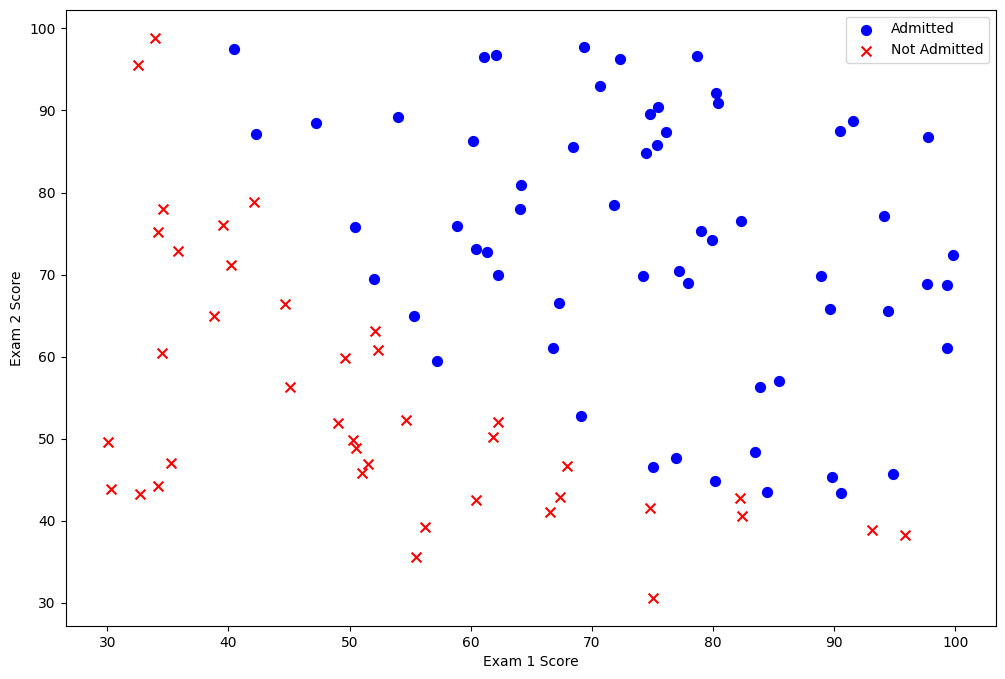

In [8]:
# Visualize data
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()


In [10]:
# Set up input and output matrices
X = data[['Exam 1', 'Exam 2']].values
m, n = X.shape
X = np.concatenate((np.ones((m, 1)), X), axis=1)
n += 1
Y = np.array(data[['Admitted']])

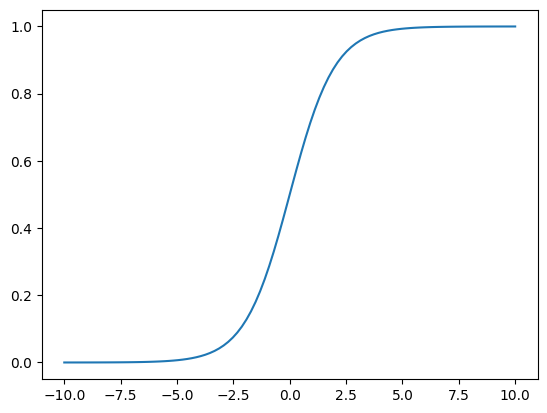

In [11]:
# Test sigmoid function
z = np.linspace(-10, 10, 100)
out = sigmoid(z)
plt.figure()
plt.plot(z, out)
plt.show()

In [15]:
# Test logistic cost function
W = np.matrix(np.ones((3, 1))*0.1)
print('Test cost function: ', logistic_cost(W, X, Y))

Test cost function:  4.306135502954107


/tmp/ipython-input-14-1493623720.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(-1.0/m * (np.dot(Y.T, np.log(h)) + np.dot((1-Y).T, np.log(1-h))))


In [18]:
# Test logistic regression cost gradient
result = opt.fmin_tnc(func=logistic_cost, x0=W, fprime=cost_gradient, args=(X, Y))
print('Logistic cost after optimization: ', logistic_cost(result[0], X, Y))

Logistic cost after optimization:  0.2034977326768895


/tmp/ipython-input-14-1493623720.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(-1.0/m * (np.dot(Y.T, np.log(h)) + np.dot((1-Y).T, np.log(1-h))))


In [23]:
# Predict with computed weights
Y_hat = predict(result[0], X)
accuracy1 = 1.0/m * np.sum(Y_hat == Y.reshape((m,)))

print("Accuracy with our implementation: ", accuracy1)

# Test with sklearn
logreg = linear_model.LogisticRegression(penalty=None)
logreg.fit(X, Y.reshape((m,)).T)
result2 = logreg.predict(X)
accuracy2 = np.sum(result2 == Y.reshape((m,))) / m
print("Accuracy with sklearn: ", accuracy2)

# The two accuracies should be the same

Accuracy with our implementation:  0.89
Accuracy with sklearn:  0.89


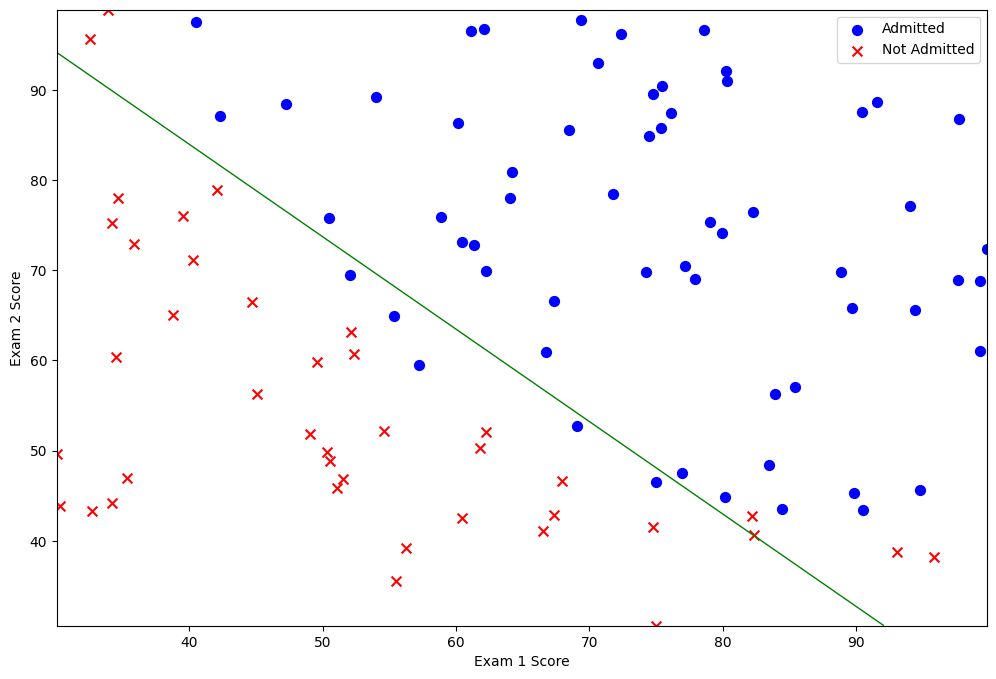

In [24]:
# Visualize decision boundary
x1_min, x1_max = X[:, 1].min(), X[:, 1].max(),
x2_min, x2_max = X[:, 2].min(), X[:, 2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()].dot(result[0]))
h = h.reshape(xx1.shape)
fig, ax = plt.subplots(figsize=(12,8))
ax.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()



In [25]:
# Predict with computed weights
Y_hat = predict(result[0], X)
accuracy1 = 1.0/m * np.sum(Y_hat == Y.reshape((m,)))

print("Accuracy with our implementation: ", accuracy1)

# Test with sklearn
logreg = linear_model.LogisticRegression(penalty=None)
logreg.fit(X, Y.reshape((m,)).T)
result2 = logreg.predict(X)
accuracy2 = np.sum(result2 == Y.reshape((m,))) / m
print("Accuracy with sklearn: ", accuracy2)

# The two accuracies should be the same

Accuracy with our implementation:  0.89
Accuracy with sklearn:  0.89
